<a href="https://colab.research.google.com/github/samirjhb/Curso-Node-TS/blob/main/AprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv("./spi.csv") 
datos = data
data.head()

,spi_rank,country,spi_score,basic_human_needs,wellbeing,opportunity,basic_nutri_med_care,water_sanitation,shelter,personal_safety,access_basic_knowledge,access_info_comm,health_wellness,env_quality,personal_rights,personal_freedom_choice,inclusiveness,access_adv_edu
0,1.0,Norway,92.63,95.29,93.30,89.30,98.81,98.33,93.75,90.29,98.66,95.80,89.32,89.44,96.34,91.16,83.77,85.92
1,2.0,Finland,92.26,95.62,93.09,88.07,98.99,99.26,96.48,87.75,96.32,95.14,85.73,95.15,96.13,88.10,82.81,85.23
2,3.0,Denmark,92.15,95.30,92.74,88.41,98.62,98.21,94.92,89.46,97.44,98.18,85.15,90.20,97.08,90.03,81.64,84.89
3,4.0,Iceland,91.78,96.66,93.65,85.04,98.99,98.82,93.16,95.66,99.51,93.12,91.02,90.93,95.14,88.01,77.63,79.39
4,5.0,Switzerland,91.78,95.25,93.80,86.28,98.72,98.96,92.97,90.35,98.60,95.07,91.50,90.05,96.69,90.65,74.81,82.99


In [125]:
data.spi_rank.describe()

count    168.000000
mean      84.500000
std       48.641546
min        1.000000
25%       42.750000
50%       84.500000
75%      126.250000
max      168.000000
Name: spi_rank, dtype: float64

In [126]:
# Limpiar y preprocesar los datos
data = data.dropna()
data = data.drop_duplicates()


In [127]:
# Seleccionar las columnas relevantes para el análisis
cols_to_keep = ["access_adv_edu", "wellbeing", "basic_human_needs", "personal_rights"]
data = data[cols_to_keep]

In [128]:
# Aplicar estandarización a los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [129]:
# Aplicar PCA para reducir la dimensionalidad de los datos
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [130]:
# Aplicar agrupamiento jerárquico para clasificar los países
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(data_pca)


AgglomerativeClustering()

In [131]:
# Asignar las etiquetas de los cluster a cada país
data["Cluster"] = agg_clustering.labels_

In [132]:
# Asignar la clasificación de "mejor" o "peor" a cada país en función de su cluster
data["Clasificacion"] = data["Cluster"].apply(lambda x: "Mejor" if x == 0 else "Peor")


In [133]:
# Visualizar los resultados
print(data)

     access_adv_edu  wellbeing  basic_human_needs  personal_rights  Cluster  \
0             85.92      93.30              95.29            96.34        0   
1             85.23      93.09              95.62            96.13        0   
2             84.89      92.74              95.30            97.08        0   
3             79.39      93.65              96.66            95.14        0   
4             82.99      93.80              95.25            96.69        0   
..              ...        ...                ...              ...      ...   
163           29.80      38.41              40.21            23.80        1   
164           22.84      35.95              44.94            14.88        1   
165           24.76      36.26              35.65            52.04        1   
166           26.43      34.83              29.91            52.39        1   
167           20.17      34.17              39.96            27.40        1   

    Clasificacion  
0           Mejor  
1          

# Graficas evaluativas

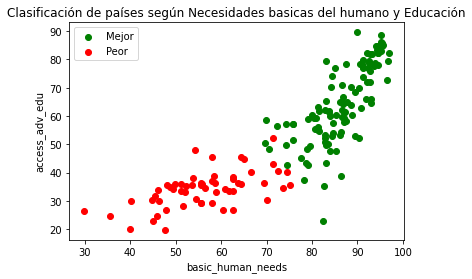

In [134]:

# Seleccionar los datos de los países clasificados como "mejor"
data_mejor = data[data["Clasificacion"] == "Mejor"]

# Seleccionar los datos de los países clasificados como "peor"
data_peor = data[data["Clasificacion"] == "Peor"]

# Crear un gráfico de dispersión
plt.scatter(data_mejor["basic_human_needs"], data_mejor["access_adv_edu"], color="green", label="Mejor")
plt.scatter(data_peor["basic_human_needs"], data_peor["access_adv_edu"], color="red", label="Peor")

# Añadir etiquetas y títulos al gráfico
plt.xlabel("basic_human_needs")
plt.ylabel("access_adv_edu")
plt.title("Clasificación de países según Necesidades basicas del humano y Educación")

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

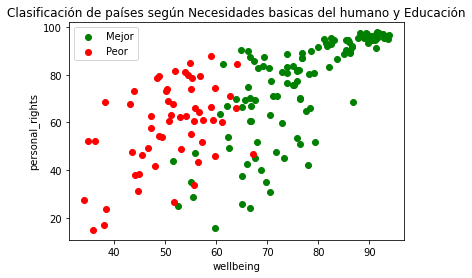

In [135]:

# Seleccionar los datos de los países clasificados como "mejor"
data_mejor = data[data["Clasificacion"] == "Mejor"]

# Seleccionar los datos de los países clasificados como "peor"
data_peor = data[data["Clasificacion"] == "Peor"]

# Crear un gráfico de dispersión
plt.scatter(data_mejor["wellbeing"], data_mejor["personal_rights"], color="green", label="Mejor")
plt.scatter(data_peor["wellbeing"], data_peor["personal_rights"], color="red", label="Peor")

# Añadir etiquetas y títulos al gráfico
plt.xlabel("wellbeing")
plt.ylabel("personal_rights")
plt.title("Clasificación de países según Necesidades basicas del humano y Educación")

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Indice de desarrollo progresivo mundial 

In [139]:
values = dict(type='choropleth',
              locations = datos['country'],
              locationmode = 'country names',
              colorscale = 'Greens',
              z = datos['spi_score'],
              text = datos['country'],
              colorbar = {'title': 'Rangos del Proceso Global'}
             )
layout = dict(title='Indice del proceso Global',
              geo = dict(showframe=True,
                         projection = {'type':'azimuthal equal area'}
                        )
             )
figure = go.Figure(data=[values], layout=layout)
iplot(figure)

-----